In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from  xgboost import XGBRegressor
warnings.filterwarnings('ignore')

## Import the CSV data as pandas DataFrame

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']


In [10]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [8]:

ls = ['gender', 'race/ethnicity','parental level of education', 'lunch', 'test preparation course']
for i in ls:
    print(f"Categories in  '{i}': ", end=" ")
    print(df[i].unique())

Categories in  'gender':  ['female' 'male']
Categories in  'race/ethnicity':  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in  'parental level of education':  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in  'lunch':  ['standard' 'free/reduced']
Categories in  'test preparation course':  ['none' 'completed']


In [15]:
# create Column Transformer with 3 types of transformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)



In [16]:
X = preprocessor.fit_transform(X)

In [24]:
X.shape

(1000, 19)

In [25]:
y.shape

(1000,)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [28]:
def evalulate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rsme = np.sqrt(mean_absolute_error(true, predicted))
    r2score = r2_score(true, predicted)
    return mae, rsme, r2score


In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list = []

r2_list = []

for key, value in models.items():
    model = value
    model.fit(X_train, y_train)
    
    # Make preidctions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaulate Train and Test dataset
    
    model_train_mae, model_train_rsme, model_train_r2 = evalulate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rsme, model_test_r2 = evalulate_model(y_test, y_test_pred)
    
    print(key)
    model_list.append(key)
    
    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rsme))
    print("- Mean absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print('--------------------------------------------')
    
    print("Model performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rsme))
    print("- Mean absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('--------------------------------------------')
    r2_list.append(model_test_r2)

    
    

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 2.0657
- Mean absolute Error: 4.2671
- R2 Score: 0.8743
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0532
- Mean absolute Error: 4.2158
- R2 Score: 0.8803
--------------------------------------------
Lasso
Model performance for Training set
- Root Mean Squared Error: 2.2817
- Mean absolute Error: 5.2063
- R2 Score: 0.8071
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2711
- Mean absolute Error: 5.1579
- R2 Score: 0.8253
--------------------------------------------
Ridge
Model performance for Training set
- Root Mean Squared Error: 2.0652
- Mean absolute Error: 4.2650
- R2 Score: 0.8743
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0521
- Mean absolute Error: 4.2111
- R2 Score: 0.8806
--------------------------------------------
K-Nei

In [31]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

print(list(models))

['LinearRegression', 'Lasso', 'Ridge', 'K-Neighbors Regressor', 'Decision Tree', 'RandomForestRegressor', 'XGBRegressor', 'CatBoostRegressor', 'AdaBoostRegressor']


In [37]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880345
5,RandomForestRegressor,0.853517
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.848742
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.761505


### Linear Regression

In [38]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


### Plot Y_pred and Y_test

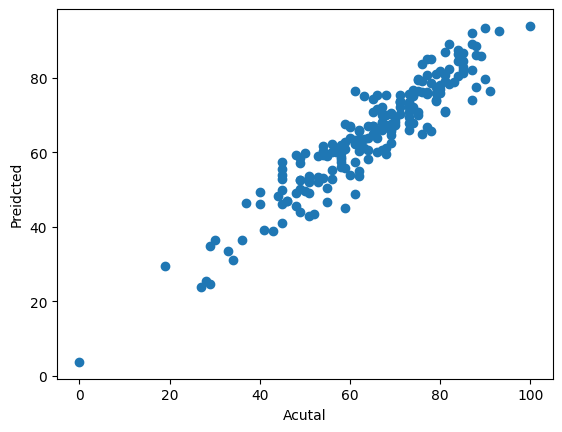

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Acutal")
plt.ylabel("Preidcted");

<Axes: xlabel='math score'>

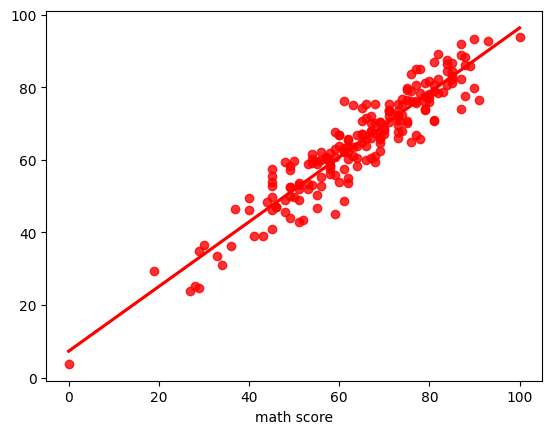

In [41]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")